# XGBoost

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

import shap

# Load data
df = pd.read_csv('new_hope.csv')
df.head()

,Year,State,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of Labor Force Unemployed in State/Area,total_import,...,Population,violent total,Murder,rape,Robbery,Aggravated assault,property total,Burglary,Larceny theft,vehicle theft
0,1992,Alabama,0.00,7.84,7.84,140.3,3.151380e+06,1.962246e+06,7.525000,532665.0,...,4136000,871.7,11.0,41.2,164.9,654.6,4396.4,1186.0,2848.2,362.3
1,1992,Alaska,8.76,7.84,8.76,140.3,3.946537e+05,2.863329e+05,8.858333,532665.0,...,587000,660.5,7.5,98.6,109.0,445.3,4909.0,880.7,3531.2,497.1
2,1992,Arizona,0.00,7.84,7.84,140.3,2.954322e+06,1.875194e+06,7.566667,532665.0,...,3832000,670.8,8.1,43.0,153.1,466.6,6357.8,1411.7,4124.6,821.5
3,1992,Arkansas,6.73,7.84,7.84,140.3,1.824976e+06,1.159072e+06,7.000000,532665.0,...,2399000,576.5,10.8,41.3,125.5,399.0,4185.2,1092.7,2763.2,329.3
4,1992,California,7.84,7.84,7.84,140.3,2.304854e+07,1.530173e+07,9.350000,532665.0,...,30867000,1119.7,12.7,41.3,424.1,641.6,5559.8,1384.9,3137.8,1037.1


In [14]:
X = df.drop("Percent (%) of Labor Force Unemployed in State/Area",axis=1)
y = df["Percent (%) of Labor Force Unemployed in State/Area"]
X['State'] = X['State'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=True)

# Set parameters for regression
params = {
    "objective": "reg:squarederror",  # Objective for regression
    "eval_metric": "rmse",           # Metric for evaluation
    "max_depth": 5,                  # Maximum depth of trees
    "eta": 0.1,                      # Learning rate
    "seed": 42                       # For reproducibility
}

# Train the XGBoost model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=500,  # Number of boosting rounds
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10
)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate model performance
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

[0]	train-rmse:1.78484	test-rmse:1.68929
[1]	train-rmse:1.64115	test-rmse:1.56563
[2]	train-rmse:1.51135	test-rmse:1.45032
[3]	train-rmse:1.39474	test-rmse:1.34852
[4]	train-rmse:1.28979	test-rmse:1.25897
[5]	train-rmse:1.19615	test-rmse:1.17942
[6]	train-rmse:1.10580	test-rmse:1.10525
[7]	train-rmse:1.03016	test-rmse:1.04171
[8]	train-rmse:0.95828	test-rmse:0.98322
[9]	train-rmse:0.89275	test-rmse:0.93268
[10]	train-rmse:0.83607	test-rmse:0.89014
[11]	train-rmse:0.78582	test-rmse:0.85196
[12]	train-rmse:0.73829	test-rmse:0.81566
[13]	train-rmse:0.69616	test-rmse:0.78915
[14]	train-rmse:0.65657	test-rmse:0.76026
[15]	train-rmse:0.61705	test-rmse:0.73301
[16]	train-rmse:0.58203	test-rmse:0.70740
[17]	train-rmse:0.55263	test-rmse:0.69125
[18]	train-rmse:0.52774	test-rmse:0.67907
[19]	train-rmse:0.50234	test-rmse:0.66111
[20]	train-rmse:0.48102	test-rmse:0.64757
[21]	train-rmse:0.46461	test-rmse:0.63955
[22]	train-rmse:0.44431	test-rmse:0.62813
[23]	train-rmse:0.43084	test-rmse:0.62249
[2

# Feature Importance

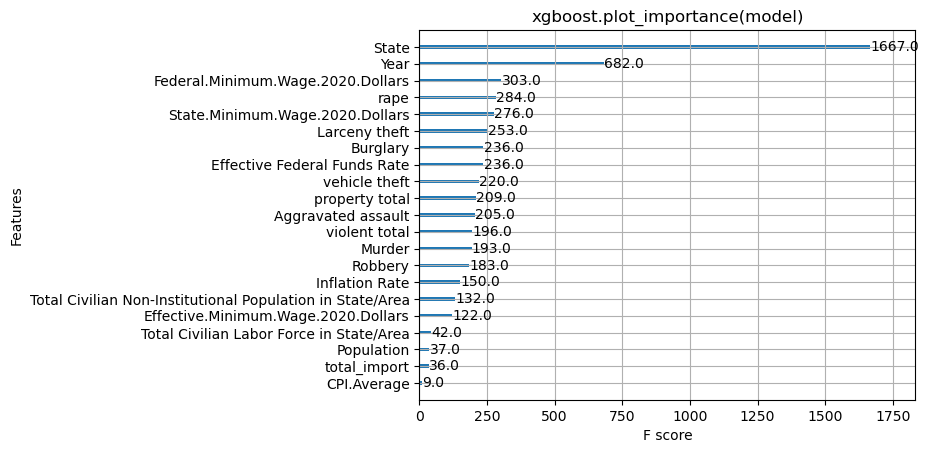

In [15]:
xgb.plot_importance(model)
plt.title("xgboost.plot_importance(model)")
plt.show()

# Try SHAP

In [19]:
dX = xgb.DMatrix(X, label=y, enable_categorical=True)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(dX)

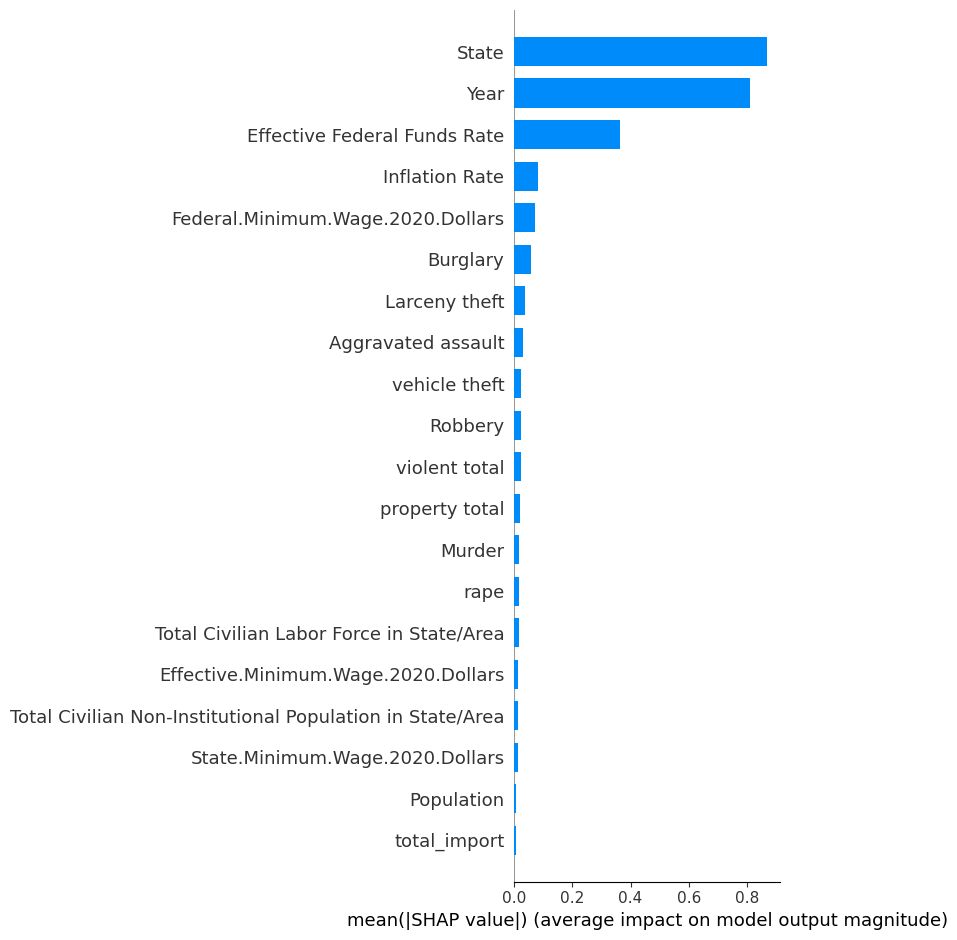

In [20]:
shap.summary_plot(shap_values, X, plot_type="bar")